In [1]:
# Data wrangling
import numpy as np
import pandas as pd
import ast
import collections as c

# Plotting and visualziation 
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import gridspec
import seaborn as sns
from wordcloud import WordCloud
pd.set_option('display.max_columns', None)

# Machine learning
import nltk
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from collections import Counter
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import manhattan_distances
from gensim.models.keyedvectors import KeyedVectors

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

### 2.1.1. Practical Task: Text processing, feature extraction and representation by using both TF and TF-IDF schemes


2.1. Data preparation: load the file, access the columns, then through printing and visualization, understand the meaning in each column. Then create a new column, name it as ‘description’ by concatenating the strings from two columns: tagline and overview. 

In [2]:
# Importing data set and convert it to a dataframe
dfm = pd.read_csv('Exam_MB210_NLP.csv')
dfm.head()

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
3  [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
4  [{"id": 818, "name": "based on novel"}, {"id":...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   
3  Following the death of District Attorney Harve...  112.312950   
4  John Carter is a war-weary, former military ca...   43.926995   

                                production_companies  \
0  [{"name": "Ingenious Film Partners", "id": 289...   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...   
3  [{"name": "Legendary Pictures", "id": 923}, {"...   
4        [{"name": "Walt Disney Pictures", "id": 2}]   

                                production_countries release_date     revenue  \
0  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10  2787965087   
1  [{"iso_3166_1": "US", "name": "United States o...   2007-05-19   961000000   
2  [{"iso_3166_1": "GB", "name": "United Kingdom"...   2015-10-26   880674609   
3  [{"iso_3166_1": "US", "name": "United States o...   2012-07-16  1084939099   
4  [{"iso_3166_1": "US", "name": "United States o...   2012-03-07   284139100   

   runtime                                   spoken_languages    status  \
0    162.0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1    169.0           [{"iso_639_1": "en", "name": "English"}]  Released   
2    148.0  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released   
3    165.0           [{"iso_639_1": "en", "name": "English"}]  Released   
4    132.0           [{"iso_639_1": "en", "name": "English"}]  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   
3                                 The Legend Ends   
4            Lost in our world, found in another.   

                                      title  vote_average  vote_count  
0                                    Avatar           7.2       11800  
1  Pirates of the Caribbean: At World's End           6.9        4500  
2                                   Spectre           6.3        4466  
3                     The Dark Knight Rises           7.6        9106  
4                               John Carter           6.1        2124

In [3]:
# Checking basic info of the data
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [4]:
# Checking column names
dfm.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [5]:
# Checking number of rows and columns
dfm.shape

(4803, 20)

In [6]:
# Changing number display format 
pd.options.display.float_format = '{:,.2f}'.format

In [7]:
# Calculating basic statistics for numeric data columns
dfm.describe()

budget         id  popularity          revenue  runtime  \
count       4,803.00   4,803.00    4,803.00         4,803.00 4,801.00   
mean   29,045,039.88  57,165.48       21.49    82,260,638.65   106.88   
std    40,722,391.26  88,694.61       31.82   162,857,100.94    22.61   
min             0.00       5.00        0.00             0.00     0.00   
25%       790,000.00   9,014.50        4.67             0.00    94.00   
50%    15,000,000.00  14,629.00       12.92    19,170,001.00   103.00   
75%    40,000,000.00  58,610.50       28.31    92,917,187.00   118.00   
max   380,000,000.00 459,488.00      875.58 2,787,965,087.00   338.00   

       vote_average  vote_count  
count      4,803.00    4,803.00  
mean           6.09      690.22  
std            1.19    1,234.59  
min            0.00        0.00  
25%            5.60       54.00  
50%            6.20      235.00  
75%            6.80      737.00  
max           10.00   13,752.00

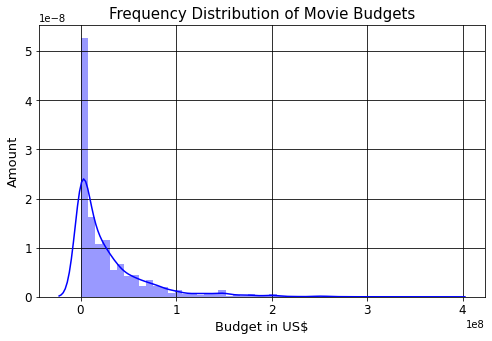

In [8]:
# Visualization of movie budgets
fig = plt.figure(figsize=(8, 5))
sns.distplot(dfm["budget"], color = "blue")
plt.ylabel('Amount', fontsize=13)
plt.xlabel("Budget in US$", fontsize=13)
plt.title("Frequency Distribution of Movie Budgets", fontsize= 15)
plt.grid(color = "k")
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12, rotation=0);

In [9]:
# Creation of a new 'sorted' column
def map_score(score):
  if score >= 8:
    return 'Very Good'
  elif score >= 6.5:
    return "Good"
  elif score >= 5:
    return "Average"
  else:
    return "Bad"

dfm["Quality"] = dfm["vote_average"].apply(lambda score: map_score(score))

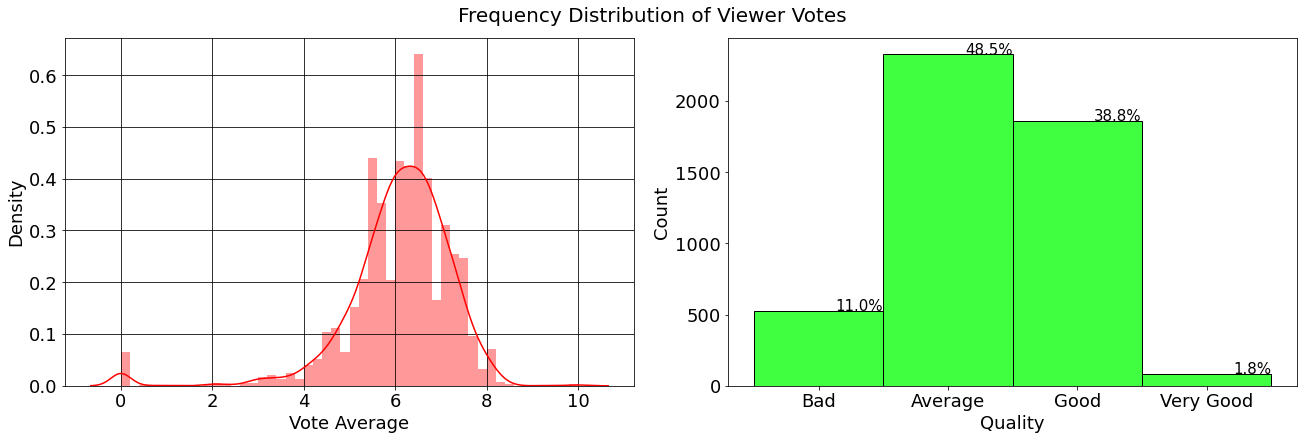

In [10]:
# Figure size definition
fig = plt.figure(figsize=(18, 6), constrained_layout= True)

# GridSpec for dividing the dashboard into two columns
gs = GridSpec(nrows=1, ncols=2, figure=fig)
# Creation of the first chart
ax1 = fig.add_subplot(gs[0, 0])
plt.grid(color = "k")
plt.xticks(fontsize=18, rotation=0)
plt.yticks(fontsize=18, rotation=0)
sns.distplot(dfm["vote_average"], ax = ax1, color = "red")
plt.xlabel('Vote Average', fontsize = 18)
plt.ylabel('Density', fontsize = 18)

# Creation of the second chart
ax2 = fig.add_subplot(gs[0, 1])
plt.xticks(fontsize=18, rotation=0)
plt.yticks(fontsize=18, rotation=0)
# Arrange column order
dfm["Quality"] = pd.Categorical(dfm["Quality"], ['Bad','Average','Good','Very Good'])
sns.histplot(dfm["Quality"], ax = ax2, color = "lime")
# Creating percentages for each column
total = float(len(dfm["Quality"]))
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax2.annotate(percentage, (x, y),ha='right',fontsize=15)
plt.xlabel('Quality', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.suptitle("Frequency Distribution of Viewer Votes", fontsize = 20);

In [11]:
# Creation of a new 'sorted' column
def map_score(score):
  if score >= 120:
    return 'Long'
  elif score > 60:
    return "Average Runtime"
  else: 
    return "Short"

dfm["Runtime_Class"] = dfm["runtime"].apply(lambda score: map_score(score))

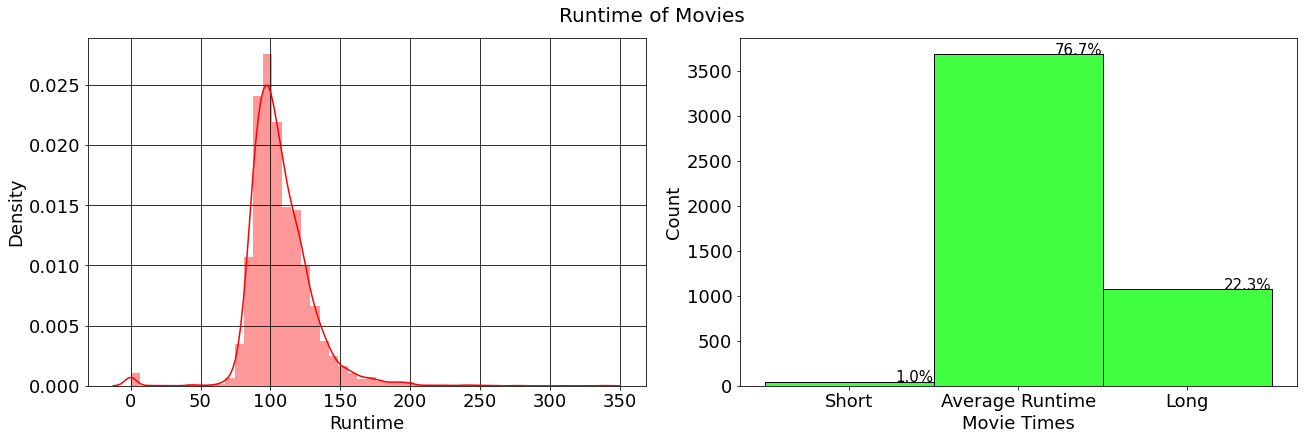

In [12]:
# Figure size definition
fig = plt.figure(figsize=(18, 6), constrained_layout= True)

# GridSpec for dividing the dashboard into two columns
gs = GridSpec(nrows=1, ncols=2, figure=fig)
# Creation of the first chart
ax1 = fig.add_subplot(gs[0, 0])
plt.grid(color = "k")
plt.xticks(fontsize=18, rotation=0)
plt.yticks(fontsize=18, rotation=0)
sns.distplot(dfm["runtime"], ax = ax1, color = "red")
plt.xlabel('Runtime', fontsize = 18)
plt.ylabel('Density', fontsize = 18)

# Creation of the second chart
ax2 = fig.add_subplot(gs[0, 1])
plt.xticks(fontsize=18, rotation=0)
plt.yticks(fontsize=18, rotation=0)
# Arrange column order
dfm["Runtime_Class"] = pd.Categorical(dfm["Runtime_Class"], ['Short','Average Runtime','Long'])
sns.histplot(dfm["Runtime_Class"], ax = ax2, color = "lime")
# Creating percentages for each column
total = float(len(dfm["Runtime_Class"]))
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax2.annotate(percentage, (x, y),ha='right',fontsize=15)
plt.xlabel('Movie Times', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.suptitle("Runtime of Movies", fontsize = 20);

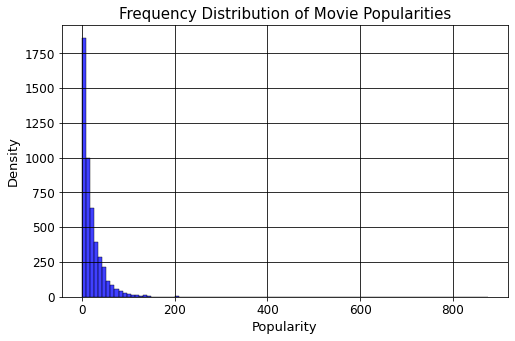

In [13]:
# Visualization of movie budgets
fig = plt.figure(figsize=(8, 5))
sns.histplot(dfm["popularity"], color = "blue", bins=100 )
plt.ylabel('Density', fontsize=13)
plt.xlabel("Popularity", fontsize=13)
plt.title("Frequency Distribution of Movie Popularities", fontsize= 15)
plt.grid(color = "k")
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12, rotation=0);

In this part, the purpose is to create a frequency plot for top 10 countries where movies are produced most.

Finding the most used keywords for movie selection

In [14]:
# Loading the data 
dfk = pd.read_csv('Exam_MB210_NLP.csv')
# Creating a variable of the relevant column
a = dfk["keywords"]
# Creating an empty dictionary
b = dict()

In [15]:
# Creating a function for counting company names
for j in a:
    for i in ast.literal_eval(j):
        if i["name"] in b:
            b[i["name"]] += 1
        else:
            b[i["name"]] = 1
b

{'culture clash': 14,
 'future': 47,
 'space war': 2,
 'space colony': 6,
 'society': 6,
 'space travel': 22,
 'futuristic': 9,
 'romance': 23,
 'space': 27,
 'alien': 76,
 'tribe': 4,
 'alien planet': 7,
 'cgi': 5,
 'marine': 3,
 'soldier': 39,
 'battle': 31,
 'love affair': 3,
 'anti war': 2,
 'power relations': 3,
 'mind and soul': 5,
 '3d': 98,
 'ocean': 16,
 'drug abuse': 11,
 'exotic island': 16,
 'east india trading company': 4,
 "love of one's life": 45,
 'traitor': 17,
 'shipwreck': 14,
 'strong woman': 5,
 'ship': 30,
 'alliance': 2,
 'calypso': 2,
 'afterlife': 16,
 'fighter': 6,
 'pirate': 14,
 'swashbuckler': 5,
 'aftercreditsstinger': 170,
 'spy': 40,
 'based on novel': 197,
 'secret agent': 26,
 'sequel': 94,
 'mi6': 2,
 'british secret service': 17,
 'united kingdom': 2,
 'dc comics': 22,
 'crime fighter': 16,
 'terrorist': 33,
 'secret identity': 34,
 'burglar': 7,
 'hostage drama': 5,
 'time bomb': 3,
 'gotham city': 7,
 'vigilante': 14,
 'cover-up': 13,
 'superhero':

In [16]:
# Finding the top 10 most productive companies
d1 = c.Counter(b)
d1.most_common(10)
z1 = dict(d1.most_common(10))

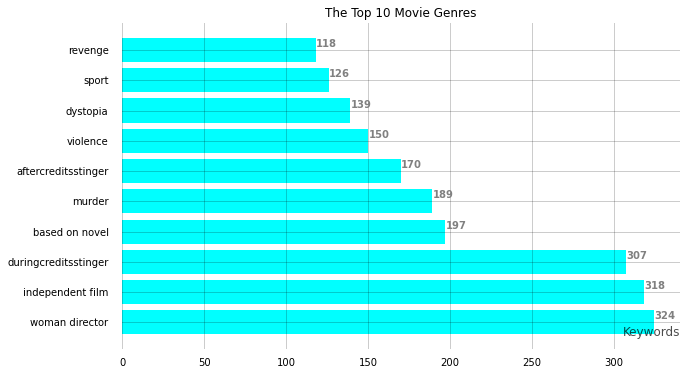

In [17]:
# Creating a figure for the most productive movie companies
fig, ax = plt.subplots(figsize =(10,6))

ax.barh(list(z1.keys()), z1.values(), color = 'cyan')
 
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='black',
        linestyle ='-', linewidth = 1,
        alpha = 0.2)
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
ax.set_title('The Top 10 Movie Genres')
fig.text(0.9, 0.15, 'Keywords', fontsize = 12,
         color ='black', ha ='right', va ='bottom',
         alpha = 0.7)

plt.show()

Finding the top 10 movie genres

In [18]:
# Loading the data 
dfg = pd.read_csv('Exam_MB210_NLP.csv')
# Creating a variable of the relevant column
t = dfg["genres"]
# Creating an empty dictionary
v = dict()

In [19]:
# Creating a function for counting company names
for j in t:
    for i in ast.literal_eval(j):
        if i["name"] in v:
            v[i["name"]] += 1
        else:
            v[i["name"]] = 1
v

{'Action': 1154,
 'Adventure': 790,
 'Fantasy': 424,
 'Science Fiction': 535,
 'Crime': 696,
 'Drama': 2297,
 'Thriller': 1274,
 'Animation': 234,
 'Family': 513,
 'Western': 82,
 'Comedy': 1722,
 'Romance': 894,
 'Horror': 519,
 'Mystery': 348,
 'History': 197,
 'War': 144,
 'Music': 185,
 'Documentary': 110,
 'Foreign': 34,
 'TV Movie': 8}

In [20]:
# Finding the top 10 most productive companies
d2 = c.Counter(v)
d2.most_common(10)
z2 = dict(d2.most_common(10))

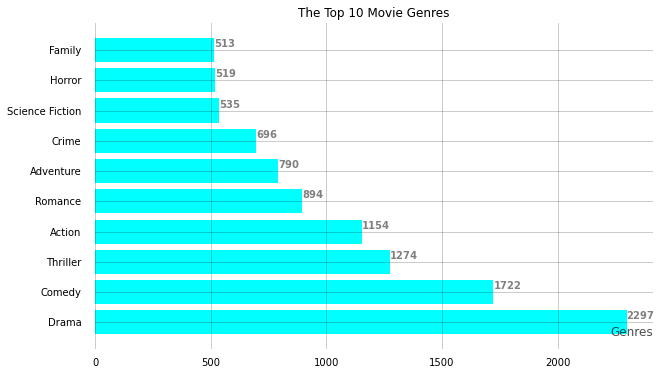

In [21]:
# Creating a figure for the most productive movie companies
fig, ax = plt.subplots(figsize =(10,6))

ax.barh(list(z2.keys()), z2.values(), color = 'cyan')
 
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='black',
        linestyle ='-', linewidth = 1,
        alpha = 0.2)
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
ax.set_title('The Top 10 Movie Genres')
fig.text(0.9, 0.15, 'Genres', fontsize = 12,
         color ='black', ha ='right', va ='bottom',
         alpha = 0.7)

plt.show()

Finding the most productive movie companies 

In [22]:
# Loading the data 
dfc = pd.read_csv('Exam_MB210_NLP.csv')
# Creating a variable of the relevant column
x = dfc["production_companies"]
# Creating an empty dictionary
y = dict()

In [23]:
# Creating a function for counting company names
for j in x:
    for i in ast.literal_eval(j):
        if i["name"] in y:
            y[i["name"]] += 1
        else:
            y[i["name"]] = 1
y

{'Ingenious Film Partners': 29,
 'Twentieth Century Fox Film Corporation': 222,
 'Dune Entertainment': 59,
 'Lightstorm Entertainment': 5,
 'Walt Disney Pictures': 114,
 'Jerry Bruckheimer Films': 21,
 'Second Mate Productions': 2,
 'Columbia Pictures': 201,
 'Danjaq': 8,
 'B24': 1,
 'Legendary Pictures': 34,
 'Warner Bros.': 319,
 'DC Entertainment': 12,
 'Syncopy': 8,
 'Laura Ziskin Productions': 5,
 'Marvel Enterprises': 16,
 'Walt Disney Animation Studios': 8,
 'Marvel Studios': 13,
 'Prime Focus': 1,
 'Revolution Sun Studios': 16,
 'Heyday Films': 10,
 'DC Comics': 15,
 'Atlas Entertainment': 13,
 'Cruel & Unusual Films': 1,
 'RatPac-Dune Entertainment': 12,
 'Bad Hat Harry Productions': 12,
 'Eon Productions': 22,
 'Infinitum Nihil': 4,
 'Silver Bullet Productions (II)': 1,
 'Blind Wink Productions': 1,
 'Classic Media': 1,
 'Cruel and Unusual Films': 7,
 'Walt Disney': 7,
 'Walden Media': 18,
 'Stillking Films': 9,
 'Ozumi Films': 1,
 'Propeler': 1,
 'Silverbell Films': 1,
 'Par

In [24]:
# Finding the top 10 most productive companies
d3 = c.Counter(y)
d3.most_common(10)
z3 = dict(d3.most_common(10))

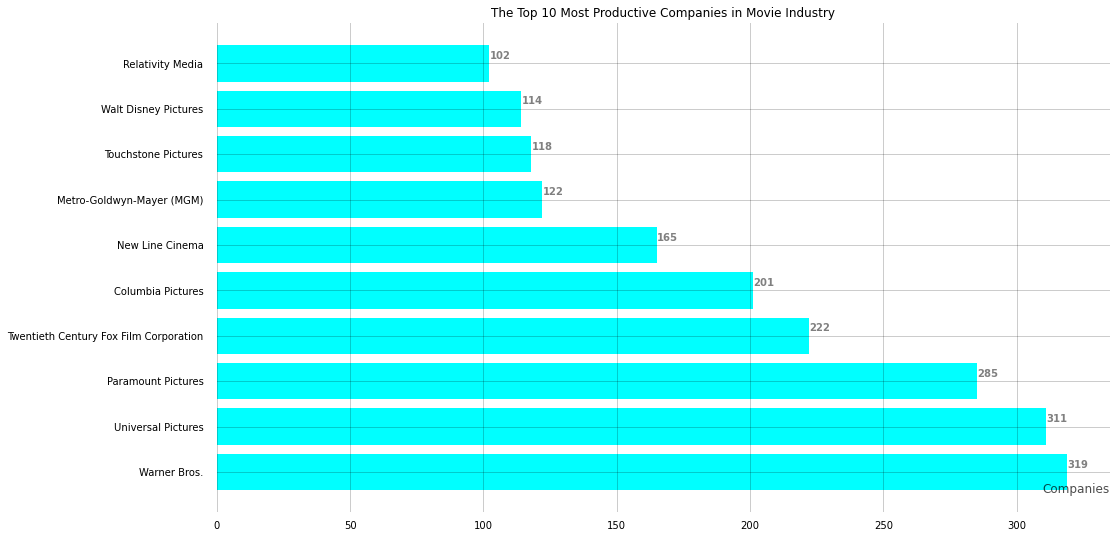

In [25]:
# Creating a figure for the most productive movie companies
fig, ax = plt.subplots(figsize =(16, 9))

ax.barh(list(z3.keys()), z3.values(), color = 'cyan')
 
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='black',
        linestyle ='-', linewidth = 1,
        alpha = 0.2)
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
ax.set_title('The Top 10 Most Productive Companies in Movie Industry')
fig.text(0.9, 0.15, 'Companies', fontsize = 12,
         color ='black', ha ='right', va ='bottom',
         alpha = 0.7)

plt.show()

Finding the countries where movies are produces most 

In [26]:
# Loading the data 
dfo = pd.read_csv('Exam_MB210_NLP.csv')
# Creating a variable of the relevant column
k = dfo["production_countries"]
# Creating an empty dictionary
m = dict()

In [27]:
# Creating a function for counting company names
for j in k:
    for i in ast.literal_eval(j):
        if i["name"] in m:
            m[i["name"]] += 1
        else:
            m[i["name"]] = 1
m

{'United States of America': 3956,
 'United Kingdom': 636,
 'Jamaica': 2,
 'Bahamas': 4,
 'Dominica': 1,
 'Czech Republic': 24,
 'Poland': 6,
 'Slovenia': 2,
 'New Zealand': 28,
 'Germany': 324,
 'China': 59,
 'Canada': 261,
 'Italy': 72,
 'Japan': 58,
 'Malta': 4,
 'Australia': 110,
 'France': 306,
 'Belgium': 25,
 'India': 54,
 'Netherlands': 18,
 'Spain': 71,
 'United Arab Emirates': 14,
 'Hong Kong': 48,
 'Taiwan': 5,
 'Ireland': 37,
 'Morocco': 4,
 'Hungary': 13,
 'Singapore': 2,
 'Norway': 14,
 'Sweden': 19,
 'South Africa': 20,
 'Russia': 19,
 'Romania': 12,
 'Mexico': 30,
 'Monaco': 1,
 'Switzerland': 19,
 'Pakistan': 3,
 'Malaysia': 2,
 'Finland': 5,
 'Iceland': 6,
 'Denmark': 20,
 'Tunisia': 1,
 'Philippines': 1,
 'Bulgaria': 4,
 'South Korea': 18,
 'Brazil': 13,
 'Peru': 2,
 'Luxembourg': 11,
 'Bosnia and Herzegovina': 1,
 'Kazakhstan': 2,
 'Portugal': 1,
 'Aruba': 1,
 'Libyan Arab Jamahiriya': 1,
 'Serbia': 1,
 'Ukraine': 1,
 'Chile': 2,
 'Argentina': 9,
 'Panama': 1,
 'Aus

In [28]:
# Finding the top 10 most productive companies
d4 = c.Counter(m)
d4.most_common(10)
z4 = dict(d4.most_common(10))

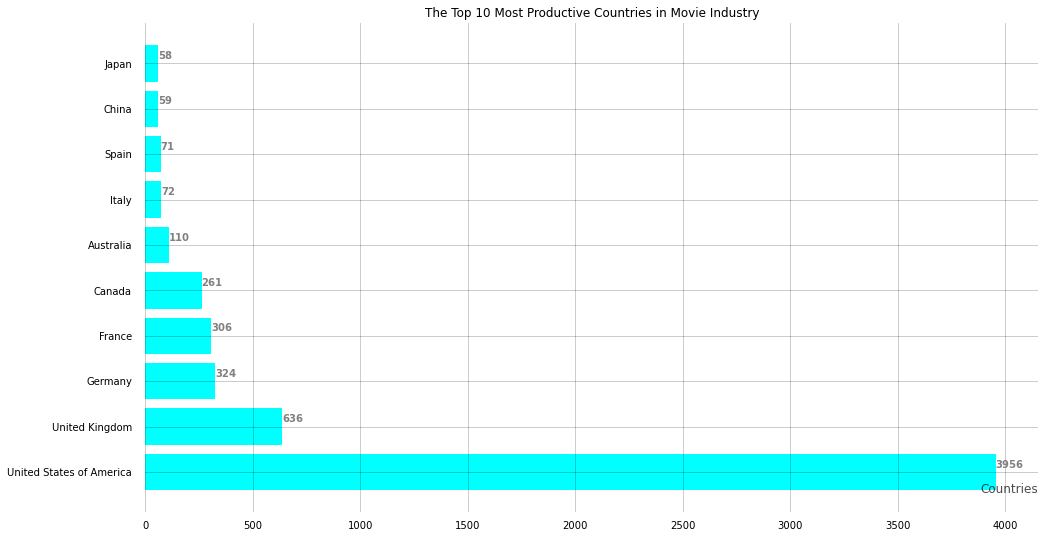

In [29]:
# Creating a figure for the most productive movie companies
fig, ax = plt.subplots(figsize =(16, 9))

ax.barh(list(z4.keys()), z4.values(), color = 'cyan')
 
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='black',
        linestyle ='-', linewidth = 1,
        alpha = 0.2)
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
ax.set_title('The Top 10 Most Productive Countries in Movie Industry')
fig.text(0.9, 0.15, 'Countries', fontsize = 12,
         color ='black', ha ='right', va ='bottom',
         alpha = 0.7)

plt.show()

In [30]:
 # Subsetting dataframe
df = dfm[["title", "tagline", "overview"]]   
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     4803 non-null   object
 1   tagline   3959 non-null   object
 2   overview  4800 non-null   object
dtypes: object(3)
memory usage: 112.7+ KB
None


title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   
3                                 The Legend Ends   
4            Lost in our world, found in another.   

                                            overview  
0  In the 22nd century, a paraplegic Marine is di...  
1  Captain Barbossa, long believed to be dead, ha...  
2  A cryptic message from Bond’s past sends him o...  
3  Following the death of District Attorney Harve...  
4  John Carter is a war-weary, former military ca...

In [31]:
# Checking null values
df.isna().sum()

title         0
tagline     844
overview      3
dtype: int64

In [32]:
#Fillna tagline
df.tagline.fillna("", inplace = True)

In [33]:
# Checking null values again
df[df.isnull().any(axis=1)]

title tagline overview
2656  Chiamatemi Francesco - Il Papa della gente              NaN
4140                 To Be Frank, Sinatra at 100              NaN
4431                                 Food Chains              NaN

In [34]:
# Dropping null values
df.dropna(inplace=True)

In [35]:
# Checking the dataframe again
print (df.isna().sum())
df.head()

title       0
tagline     0
overview    0
dtype: int64


title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   
3                                 The Legend Ends   
4            Lost in our world, found in another.   

                                            overview  
0  In the 22nd century, a paraplegic Marine is di...  
1  Captain Barbossa, long believed to be dead, ha...  
2  A cryptic message from Bond’s past sends him o...  
3  Following the death of District Attorney Harve...  
4  John Carter is a war-weary, former military ca...

Creation of 'description' column

In [36]:
# Dropping Null values for having descriptions in the new column
df = df.dropna(subset=["overview", "tagline"])
# Creating a new column
df["description"] = df["tagline"] + " " + df["overview"]
df.reset_index()

index                                     title  \
0         0                                    Avatar   
1         1  Pirates of the Caribbean: At World's End   
2         2                                   Spectre   
3         3                     The Dark Knight Rises   
4         4                               John Carter   
...     ...                                       ...   
4795   4798                               El Mariachi   
4796   4799                                 Newlyweds   
4797   4800                 Signed, Sealed, Delivered   
4798   4801                          Shanghai Calling   
4799   4802                         My Date with Drew   

                                                tagline  \
0                           Enter the World of Pandora.   
1        At the end of the world, the adventure begins.   
2                                 A Plan No One Escapes   
3                                       The Legend Ends   
4                  Lost in our world, found in another.   
...                                                 ...   
4795  He didn't come looking for trouble, but troubl...   
4796  A newlywed couple's honeymoon is upended by th...   
4797                                                      
4798                           A New Yorker in Shanghai   
4799                                                      

                                               overview  \
0     In the 22nd century, a paraplegic Marine is di...   
1     Captain Barbossa, long believed to be dead, ha...   
2     A cryptic message from Bond’s past sends him o...   
3     Following the death of District Attorney Harve...   
4     John Carter is a war-weary, former military ca...   
...                                                 ...   
4795  El Mariachi just wants to play his guitar and ...   
4796  A newlywed couple's honeymoon is upended by th...   
4797  "Signed, Sealed, Delivered" introduces a dedic...   
4798  When ambitious New York attorney Sam is sent t...   
4799  Ever since the second grade when he first saw ...   

                                            description  
0     Enter the World of Pandora. In the 22nd centur...  
1     At the end of the world, the adventure begins....  
2     A Plan No One Escapes A cryptic message from B...  
3     The Legend Ends Following the death of Distric...  
4     Lost in our world, found in another. John Cart...  
...                                                 ...  
4795  He didn't come looking for trouble, but troubl...  
4796  A newlywed couple's honeymoon is upended by th...  
4797   "Signed, Sealed, Delivered" introduces a dedi...  
4798  A New Yorker in Shanghai When ambitious New Yo...  
4799   Ever since the second grade when he first saw...  

[4800 rows x 5 columns]

In [37]:
df.head()

title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   
3                                 The Legend Ends   
4            Lost in our world, found in another.   

                                            overview  \
0  In the 22nd century, a paraplegic Marine is di...   
1  Captain Barbossa, long believed to be dead, ha...   
2  A cryptic message from Bond’s past sends him o...   
3  Following the death of District Attorney Harve...   
4  John Carter is a war-weary, former military ca...   

                                         description  
0  Enter the World of Pandora. In the 22nd centur...  
1  At the end of the world, the adventure begins....  
2  A Plan No One Escapes A cryptic message from B...  
3  The Legend Ends Following the death of Distric...  
4  Lost in our world, found in another. John Cart...

### Task 2.1.2: Text processing

Convert words in ‘description’ to lower case, remove white space, remove
words from stop_words (from nltk package), remove special characters (such as ‘/n’) and add other
necessary processings.

In [38]:
# Create a raw corpus
corpus = np.array(df.description)
print(corpus)

['Enter the World of Pandora. In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'
 'At the end of the world, the adventure begins. Captain Barbossa, long believed to be dead, has come back to life and is headed to the edge of the Earth with Will Turner and Elizabeth Swann. But nothing is quite as it seems.'
 'A Plan No One Escapes A cryptic message from Bond’s past sends him on a trail to uncover a sinister organization. While M battles political forces to keep the secret service alive, Bond peels back the layers of deceit to reveal the terrible truth behind SPECTRE.'
 ...
 ' "Signed, Sealed, Delivered" introduces a dedicated quartet of civil servants in the Dead Letter Office of the U.S. Postal System who transform themselves into an elite team of lost-mail detectives. Their determination to deliver the seemingly undeliverable takes them out of the post office i

In [39]:
# Creating a function 

wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

def token_pro(doc):
    # removing special characters, making lowercase, removing white spaces
    doc = re.sub(r"[^a-zA-Z\s]", "", doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenization
    tokens = wpt.tokenize(doc)
    # stopwords filtering
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # making a new document from filtered tokens
    doc = " ".join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(token_pro)

In [40]:
# Changing dataype of the corpus to string
corpus = corpus.astype(str)  
# Running normalization function for corpus
norm_corpus = normalize_corpus(corpus) 
print(norm_corpus)  

['enter world pandora nd century paraplegic marine dispatched moon pandora unique mission becomes torn following orders protecting alien civilization'
 'end world adventure begins captain barbossa long believed dead come back life headed edge earth turner elizabeth swann nothing quite seems'
 'plan one escapes cryptic message bonds past sends trail uncover sinister organization battles political forces keep secret service alive bond peels back layers deceit reveal terrible truth behind spectre'
 ...
 'signed sealed delivered introduces dedicated quartet civil servants dead letter office us postal system transform elite team lostmail detectives determination deliver seemingly undeliverable takes post office unpredictable world letters packages past save lives solve crimes reunite old loves change futures arriving late always miraculously time'
 'new yorker shanghai ambitious new york attorney sam sent shanghai assignment immediately stumbles legal mess could end career help beautiful re

In [41]:
# Bag-of-word (bow) creation
# Finding 10 most common words in the corpus 
from nltk import word_tokenize
words = " ".join(norm_corpus)
tokens = word_tokenize(words)

from collections import Counter
bag_of_words = Counter(tokens)
most_common_tokens = bag_of_words.most_common(10)
# Displaying the 10 most common words in the bow
print(most_common_tokens)

[('one', 984), ('life', 978), ('new', 792), ('world', 686), ('young', 643), ('love', 636), ('man', 630), ('two', 615), ('story', 601), ('family', 560)]


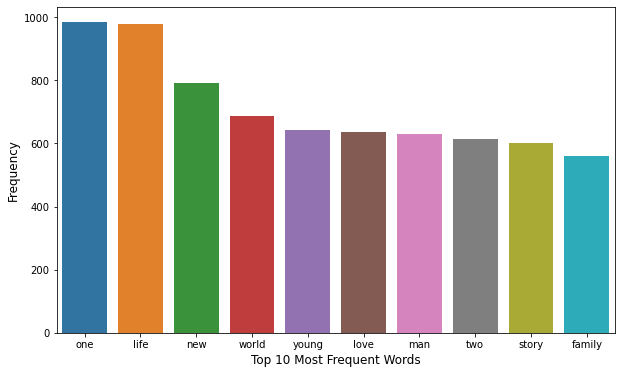

In [42]:
#Frequency Distribution of 10 most common words in bow
fdist = FreqDist(bag_of_words).most_common(10) 
# Conversion of bow to series
fdist = pd.Series(dict(fdist))
# Figure size definition
fig, ax = plt.subplots(figsize=(10,6))
# Plotting by Seaborn
plot = sns.barplot(x=fdist.index, y=fdist.values, ax=ax) 
plt.xlabel('Top 10 Most Frequent Words',size=12)
plt.ylabel('Frequency', size = 12)
plt.show()

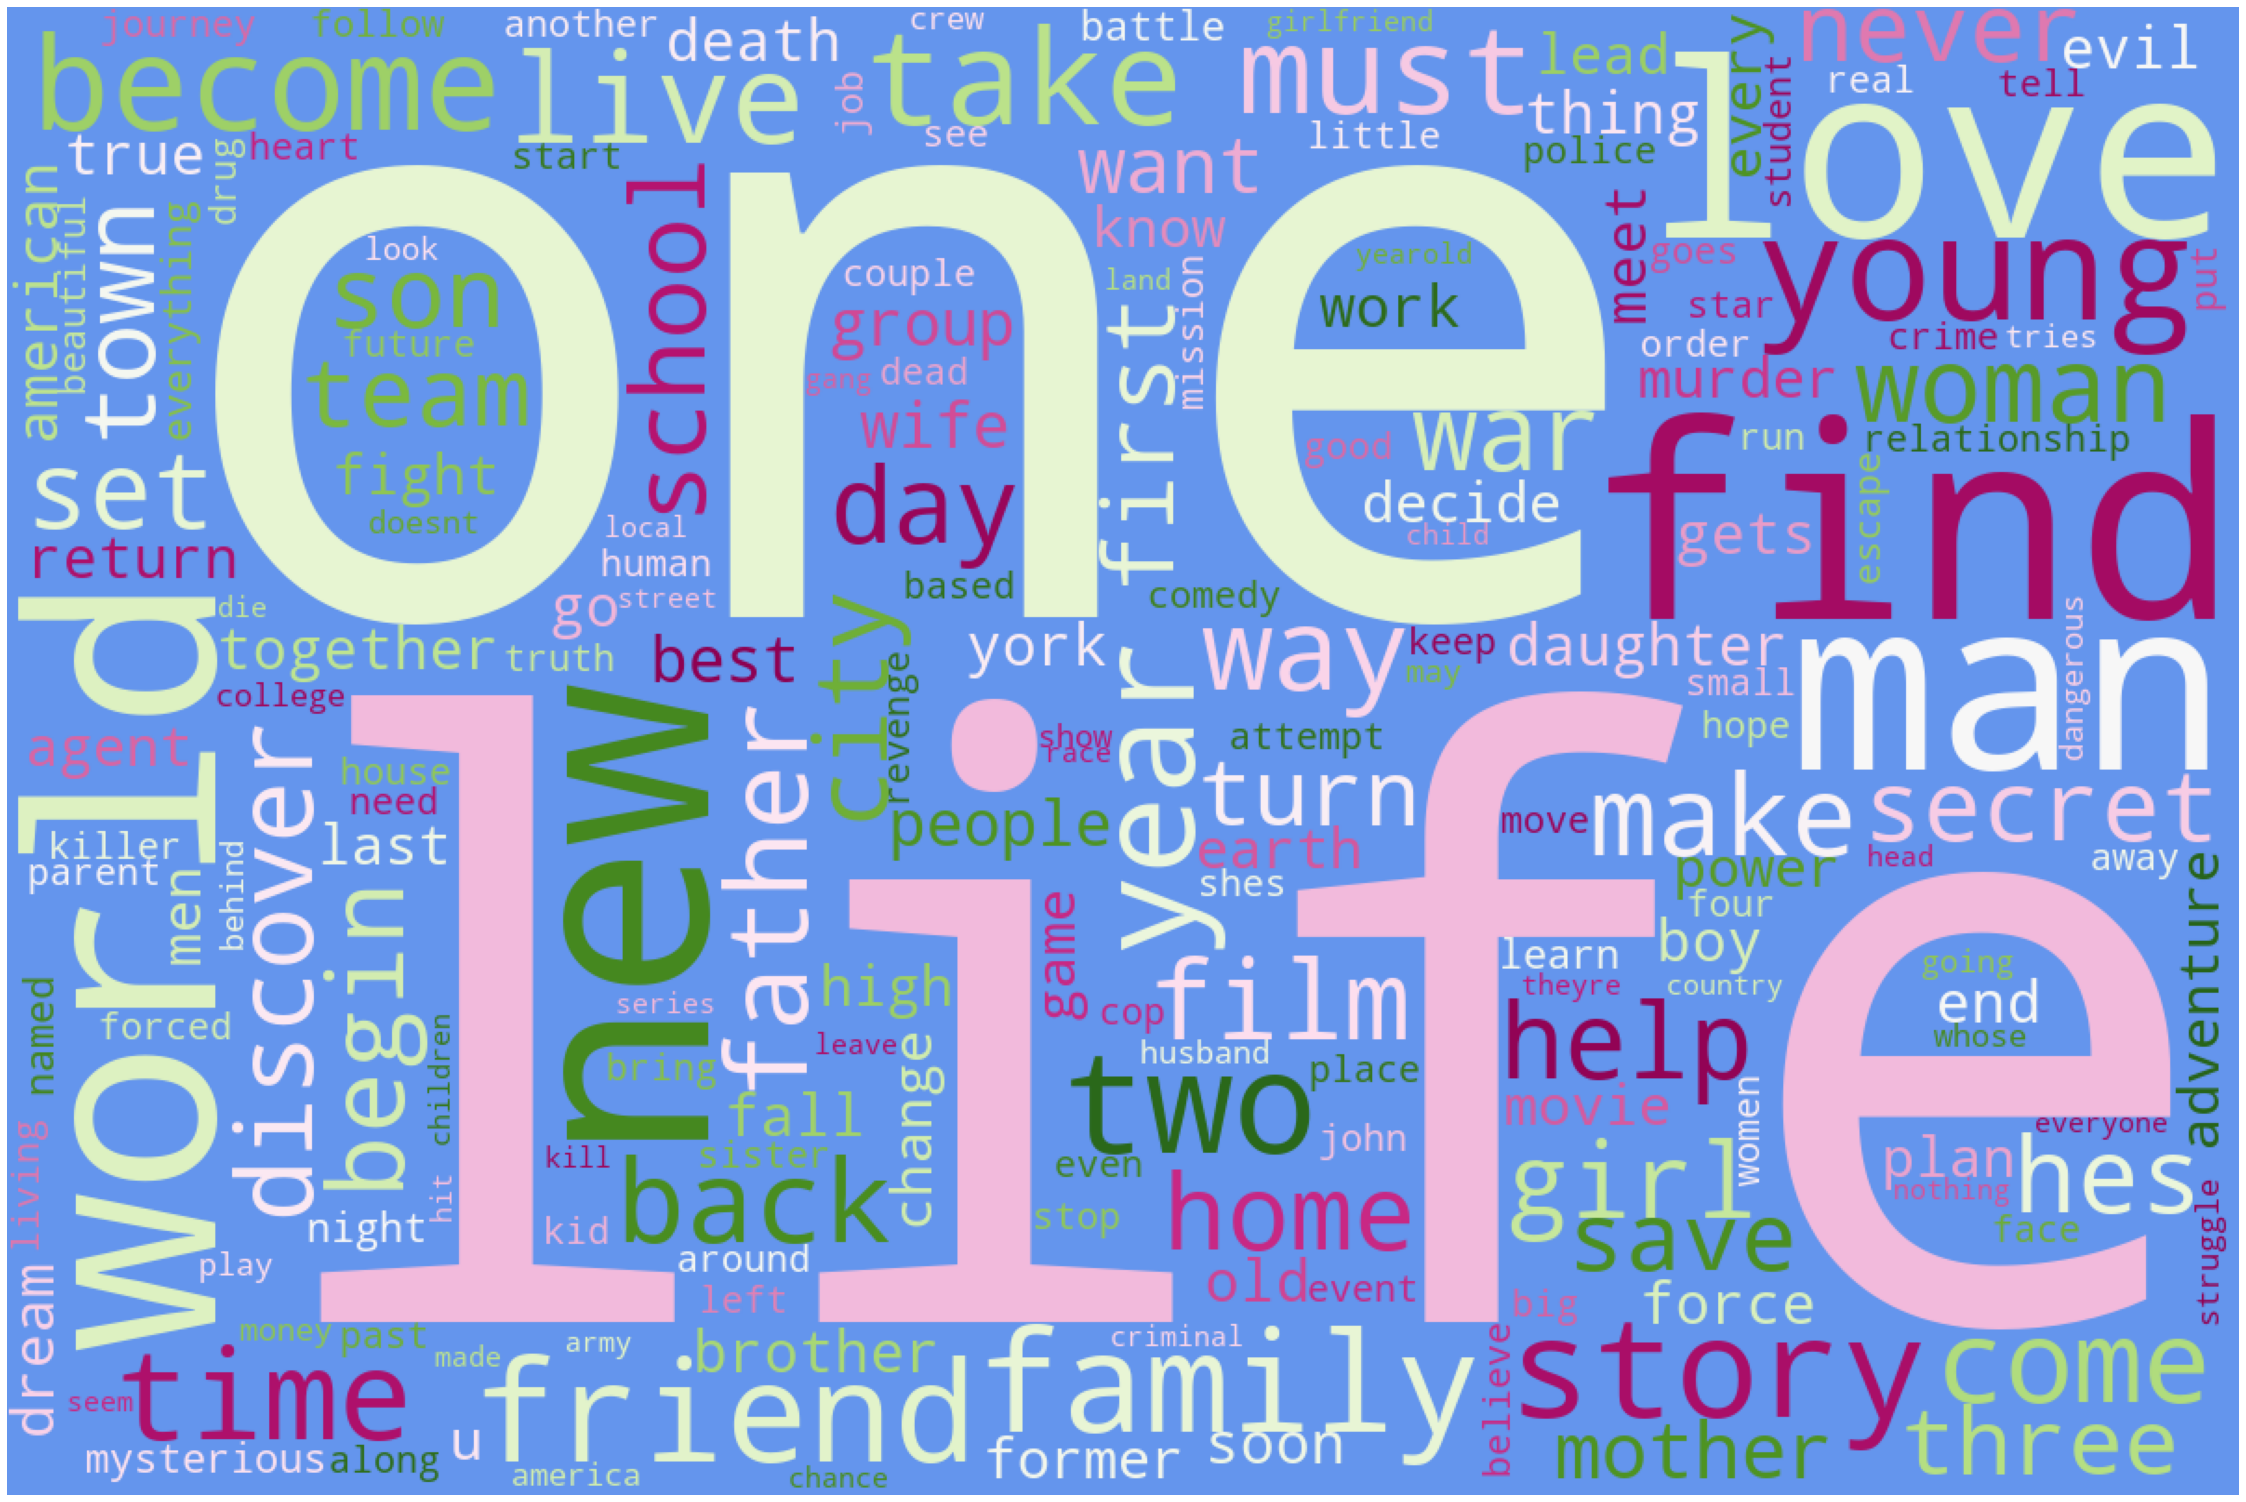

In [43]:
# Creating a function for creating a word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");
    
# Importing package for WordCloud
from wordcloud import WordCloud

# Generating word cloud
wordcloud = WordCloud(width = 1200, height = 800, background_color='cornflowerblue', colormap='PiYG', 
                      collocations=False).generate(words)
# Plotting
plot_cloud(wordcloud)

### Task 2.1.3: TF and TF-IDF representation on ‘description’: 

For each sample in the dataset, generate TF and TF-IDF representation for each sample based on the column of ‘description’.

In [44]:
# Searching index value of Spider-Man movie
movie_serach = df.loc[df['title'].str.contains("Spider-Man", case=False)]
movie_serach

title                                       tagline  \
5                Spider-Man 3                            The battle within.   
20     The Amazing Spider-Man                      The untold story begins.   
30               Spider-Man 2                  There's a hero in all of us.   
38   The Amazing Spider-Man 2                              No more secrets.   
159                Spider-Man  With great power comes great responsibility.   

                                              overview  \
5    The seemingly invincible Spider-Man goes up ag...   
20   Peter Parker is an outcast high schooler aband...   
30   Peter Parker is going through a major identity...   
38   For Peter Parker, life is busy. Between taking...   
159  After being bitten by a genetically altered sp...   

                                           description  
5    The battle within. The seemingly invincible Sp...  
20   The untold story begins. Peter Parker is an ou...  
30   There's a hero in all of us. Peter Parker is g...  
38   No more secrets. For Peter Parker, life is bus...  
159  With great power comes great responsibility. A...

In [45]:
# Tokenize Spider-Man
bow_spider_man = word_tokenize(df['description'][159])
cv = CountVectorizer(min_df=0, stop_words='english')
# Fitting the model
cv_matrix = cv.fit_transform(bow_spider_man)
# Print out vocabulary and matrix
print(cv.get_feature_names())
print(cv_matrix)
# Convert the bow to an array
bow_spider_man = cv_matrix.toarray()
print(bow_spider_man)

['altered', 'amazing', 'bitten', 'comes', 'endowed', 'genetically', 'great', 'high', 'nerdy', 'parker', 'peter', 'power', 'powers', 'responsibility', 'school', 'spider', 'student']
  (1, 6)	1
  (2, 11)	1
  (3, 3)	1
  (4, 6)	1
  (5, 13)	1
  (9, 2)	1
  (12, 5)	1
  (13, 0)	1
  (14, 15)	1
  (16, 8)	1
  (17, 7)	1
  (18, 14)	1
  (19, 16)	1
  (20, 10)	1
  (21, 9)	1
  (23, 4)	1
  (25, 1)	1
  (26, 12)	1
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 

### 2.2. Practical Task: Topic modelling

Use TF and TF-IDF representation generated in task 2.1 to perform topic modelling. Select and
compare two topic modelling algorithms from LDiA, Truncated SVD, Word2Vec or any other topic
modelling algorithms, and then analyze the results.

In [46]:
df.head()

title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   
3                                 The Legend Ends   
4            Lost in our world, found in another.   

                                            overview  \
0  In the 22nd century, a paraplegic Marine is di...   
1  Captain Barbossa, long believed to be dead, ha...   
2  A cryptic message from Bond’s past sends him o...   
3  Following the death of District Attorney Harve...   
4  John Carter is a war-weary, former military ca...   

                                         description  
0  Enter the World of Pandora. In the 22nd centur...  
1  At the end of the world, the adventure begins....  
2  A Plan No One Escapes A cryptic message from B...  
3  The Legend Ends Following the death of Distric...  
4  Lost in our world, found in another. John Cart...

In [47]:
df.shape

(4800, 4)

In [48]:
# Creating tf-idf for description column
n_samples = 4837 # the number of samples in the data file
n_features = 100 # the size of vocabulary
n_components = 10 # number of topics
n_top_words = 20
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
)
tfidf = tfidf_vectorizer.fit_transform(df.description)

In [49]:
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print(tfidf_feature_names)

['adventure', 'agent', 'american', 'away', 'based', 'battle', 'begins', 'best', 'big', 'boy', 'brother', 'city', 'come', 'comedy', 'comes', 'daughter', 'day', 'dead', 'death', 'discover', 'discovers', 'earth', 'end', 'evil', 'face', 'falls', 'family', 'father', 'fight', 'film', 'finds', 'friend', 'friends', 'future', 'game', 'gets', 'girl', 'goes', 'good', 'group', 'help', 'high', 'home', 'house', 'job', 'john', 'journey', 'just', 'left', 'life', 'like', 'little', 'live', 'lives', 'living', 'long', 'love', 'make', 'man', 'meets', 'men', 'mission', 'mother', 'movie', 'murder', 'mysterious', 'named', 'new', 'night', 'old', 'past', 'people', 'police', 'real', 'save', 'school', 'secret', 'set', 'small', 'son', 'soon', 'stop', 'story', 'takes', 'team', 'things', 'time', 'town', 'true', 'wants', 'war', 'way', 'wife', 'woman', 'work', 'world', 'year', 'years', 'york', 'young']


### Topic Modelling by Truncated SVD

In [50]:
# Truncated SVD
import pandas as pd
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=10, n_iter=100)
svd_topic_vectors = svd.fit_transform(tfidf)
print(svd_topic_vectors.shape)

(4800, 10)


In [51]:
svd_topic_vectors[0]

array([ 0.16892879, -0.30507688,  0.26177105, -0.26258779, -0.18468364,
       -0.04043188,  0.0994472 ,  0.05983923, -0.00463596,  0.08622739])

In [52]:
topic_terms = svd.components_
topic_terms.shape

(10, 100)

In [53]:
print(topic_terms[0])

[0.05571566 0.04453153 0.07939326 0.04931597 0.06515601 0.05207746
 0.07435478 0.08149476 0.05382485 0.06243233 0.04455304 0.09236322
 0.0624181  0.05238067 0.06943253 0.07428119 0.08583445 0.04690499
 0.08103215 0.04679157 0.06003912 0.05397936 0.05319535 0.06171458
 0.04418633 0.05164729 0.19922194 0.1188273  0.04858458 0.09992534
 0.11157319 0.08497016 0.10688482 0.04451275 0.03962432 0.07351887
 0.08378049 0.04634965 0.05508055 0.07029853 0.0996198  0.07978211
 0.10348425 0.04945059 0.05211954 0.04618451 0.05590675 0.10341495
 0.04732395 0.36009555 0.05856887 0.05580731 0.05223918 0.10747291
 0.05438421 0.04987865 0.22397504 0.08370025 0.24645986 0.05810677
 0.06717706 0.04618323 0.08340835 0.0495336  0.05112574 0.05916607
 0.05669649 0.24423277 0.06009189 0.11765006 0.0584584  0.07892744
 0.04813442 0.06381482 0.07887841 0.09489379 0.06994769 0.08423738
 0.06217105 0.08625831 0.07224366 0.05161588 0.21185253 0.08158495
 0.0653331  0.05134688 0.13440338 0.08888387 0.10007978 0.0476

In [54]:
svd_topic_vectors = pd.DataFrame(svd_topic_vectors)
svd_topic_vectors.round(3).head(16)

0     1     2     3     4     5     6     7     8     9
0  0.17 -0.30  0.26 -0.26 -0.18 -0.04  0.10  0.06 -0.01  0.09
1  0.28 -0.01  0.07 -0.21 -0.16 -0.03  0.02 -0.01 -0.00 -0.01
2  0.09 -0.03 -0.02 -0.01 -0.03 -0.02 -0.05  0.01 -0.02  0.01
3  0.23 -0.16 -0.20 -0.07  0.16  0.19  0.03 -0.07 -0.04 -0.08
4  0.25 -0.38  0.34 -0.29 -0.20 -0.04  0.12  0.09  0.01  0.01
5  0.35 -0.04 -0.02  0.31 -0.06  0.41  0.08  0.17 -0.27  0.09
6  0.21 -0.12 -0.16 -0.10  0.12  0.12  0.01 -0.05  0.00 -0.00
7  0.23 -0.13 -0.13 -0.08  0.04  0.07 -0.03 -0.04 -0.04 -0.08
8  0.17 -0.01 -0.08  0.02  0.00 -0.11 -0.06 -0.02 -0.01  0.17
9  0.31 -0.32  0.01 -0.22  0.03  0.12  0.09  0.03 -0.02 -0.04
10 0.19 -0.05 -0.01  0.22 -0.17  0.08 -0.00 -0.07 -0.15  0.14
11 0.22  0.07  0.07  0.09  0.10  0.04 -0.09  0.40 -0.02 -0.03
12 0.11 -0.02 -0.02 -0.02 -0.04 -0.05 -0.10  0.01 -0.03 -0.16
13 0.09 -0.04  0.01  0.01  0.01 -0.02 -0.03 -0.02  0.03 -0.03
14 0.36 -0.20  0.14  0.30 -0.34  0.22  0.03  0.02  0.26  0.07
15 0.39 -0.05 -0.30 -0.14  0.07  0.21  0.06 -0.08  0.21  0.07

In [55]:
topic_terms

array([[ 5.57156620e-02,  4.45315310e-02,  7.93932599e-02,
         4.93159674e-02,  6.51560085e-02,  5.20774574e-02,
         7.43547816e-02,  8.14947646e-02,  5.38248465e-02,
         6.24323338e-02,  4.45530352e-02,  9.23632177e-02,
         6.24181004e-02,  5.23806688e-02,  6.94325267e-02,
         7.42811859e-02,  8.58344461e-02,  4.69049886e-02,
         8.10321543e-02,  4.67915686e-02,  6.00391246e-02,
         5.39793616e-02,  5.31953469e-02,  6.17145796e-02,
         4.41863283e-02,  5.16472912e-02,  1.99221945e-01,
         1.18827300e-01,  4.85845793e-02,  9.99253356e-02,
         1.11573186e-01,  8.49701626e-02,  1.06884819e-01,
         4.45127489e-02,  3.96243209e-02,  7.35188675e-02,
         8.37804937e-02,  4.63496466e-02,  5.50805463e-02,
         7.02985282e-02,  9.96197977e-02,  7.97821103e-02,
         1.03484249e-01,  4.94505893e-02,  5.21195434e-02,
         4.61845074e-02,  5.59067526e-02,  1.03414955e-01,
         4.73239479e-02,  3.60095547e-01,  5.85688665e-0

In [56]:
# illustrated topics after truncated SVD: display topics and terms
top_terms = 30
TOTAL_TOPICS = 10 # we assume the optimal number of topics
vocabulary = np.array(tfidf_feature_names)
topic_key_term_idxs = np.argsort(-np.absolute(topic_terms), axis=1)[:,:top_terms]
topic_keyterm_weights = np.array([topic_terms[row, columns] for row, columns in
                                  list(zip(np.arange(TOTAL_TOPICS), topic_key_term_idxs))])

topic_keyterms = vocabulary[topic_key_term_idxs]
topic_keyterms_weights = list(zip(topic_keyterms, topic_keyterm_weights))

In [57]:
# topic_terms.shape
print(topic_key_term_idxs[0])
#print(tfidf_feature_names[topic_key_term_idxs[0]])
print(topic_keyterms_weights[0])

[49 58 67 95 56 99 82 26 86 97 27 69 93 91 30 90 53 32 96 42 47 88 29 40
 75 11 98 92 87 79]
(array(['life', 'man', 'new', 'world', 'love', 'young', 'story', 'family',
       'time', 'years', 'father', 'old', 'woman', 'way', 'finds', 'war',
       'lives', 'friends', 'year', 'home', 'just', 'true', 'film', 'help',
       'school', 'city', 'york', 'wife', 'town', 'son'], dtype='<U10'), array([0.36009555, 0.24645986, 0.24423277, 0.23585982, 0.22397504,
       0.2129389 , 0.21185253, 0.19922194, 0.13440338, 0.12138772,
       0.1188273 , 0.11765006, 0.11334712, 0.11255989, 0.11157319,
       0.1109221 , 0.10747291, 0.10688482, 0.1053883 , 0.10348425,
       0.10341495, 0.10007978, 0.09992534, 0.0996198 , 0.09489379,
       0.09236322, 0.09160038, 0.08939337, 0.08888387, 0.08625831]))


In [58]:
for n in range(TOTAL_TOPICS):
    print('Topic #'+str(n+1)+':')
    print('='*50)
    d1 = []
    d2 = []
    terms, weights = topic_keyterms_weights[n]
    term_weights = sorted([(t, w) for t, w in zip(terms, weights)],
                          key=lambda row: -abs(row[1]))

    for term, wt in term_weights:
        if wt >= 0:
            d1.append((term, round(wt, 3)))
        else:
            d2.append((term,round(wt,3)))
    print('Direction 1:', d1)
    print('Direction 2:', d2)

Topic #1:
Direction 1: [('life', 0.36), ('man', 0.246), ('new', 0.244), ('world', 0.236), ('love', 0.224), ('young', 0.213), ('story', 0.212), ('family', 0.199), ('time', 0.134), ('years', 0.121), ('father', 0.119), ('old', 0.118), ('woman', 0.113), ('way', 0.113), ('finds', 0.112), ('war', 0.111), ('lives', 0.107), ('friends', 0.107), ('year', 0.105), ('home', 0.103), ('just', 0.103), ('true', 0.1), ('film', 0.1), ('help', 0.1), ('school', 0.095), ('city', 0.092), ('york', 0.092), ('wife', 0.089), ('town', 0.089), ('son', 0.086)]
Direction 2: []
Topic #2:
Direction 1: [('life', 0.695), ('love', 0.208), ('story', 0.175), ('true', 0.076), ('woman', 0.033)]
Direction 2: [('world', -0.487), ('new', -0.242), ('war', -0.179), ('york', -0.119), ('city', -0.117), ('evil', -0.106), ('group', -0.075), ('time', -0.067), ('team', -0.066), ('save', -0.059), ('earth', -0.053), ('battle', -0.052), ('set', -0.05), ('young', -0.05), ('stop', -0.049), ('secret', -0.046), ('friends', -0.046), ('help', -

### Topic Modelling by LDA

In [59]:
from sklearn.decomposition import LatentDirichletAllocation

In [60]:
# another implementation with more visualization
lda = LatentDirichletAllocation(
    n_components=n_components,
    max_iter=5,
    learning_method="online",
    learning_offset=50.0,
    random_state=0,
)

lda.fit(tfidf)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, random_state=0)

In [61]:
import matplotlib.pyplot as plt
# plot_top_words, see sklearn documentation: https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    # plt.show()
    plt.savefig('topics.png')

[[7.23070902e-01 1.01801748e-01 3.62769721e+00 1.24295815e+00
  1.02674730e-01 5.04863848e-01 4.56690697e+00 8.24462453e-01
  4.49495448e+01 1.01630702e-01 1.01653353e-01 5.10969976e+00
  6.00729400e+00 6.46795782e-01 3.05660316e+01 1.08698558e-01
  1.19627899e+01 1.06452430e-01 1.01204229e-01 1.02212892e-01
  1.57287851e+00 6.25199909e+01 1.04148861e-01 1.01336241e-01
  1.21650710e+01 1.03605593e-01 1.03590193e-01 1.04609703e-01
  1.01379516e-01 1.05923490e-01 3.74759948e-01 4.32932890e-01
  8.96960463e-01 1.02080469e-01 1.01941707e-01 2.17376367e+00
  1.01250153e-01 1.02047720e-01 7.04408120e+00 1.18164950e-01
  1.20668142e+01 1.27291868e+01 4.21617946e+00 1.03066204e-01
  1.03845738e-01 1.02017400e-01 3.07365289e+01 1.02174710e-01
  2.72348859e+00 8.36551954e+00 3.38464053e+00 3.92762114e+01
  1.03125359e-01 1.03786360e+01 1.05377538e-01 1.15868792e-01
  1.95230095e-01 1.12300210e+01 9.82377659e+00 1.01558232e-01
  1.73947823e-01 1.33489081e+01 1.70637865e-01 1.02926872e-01
  1.0428

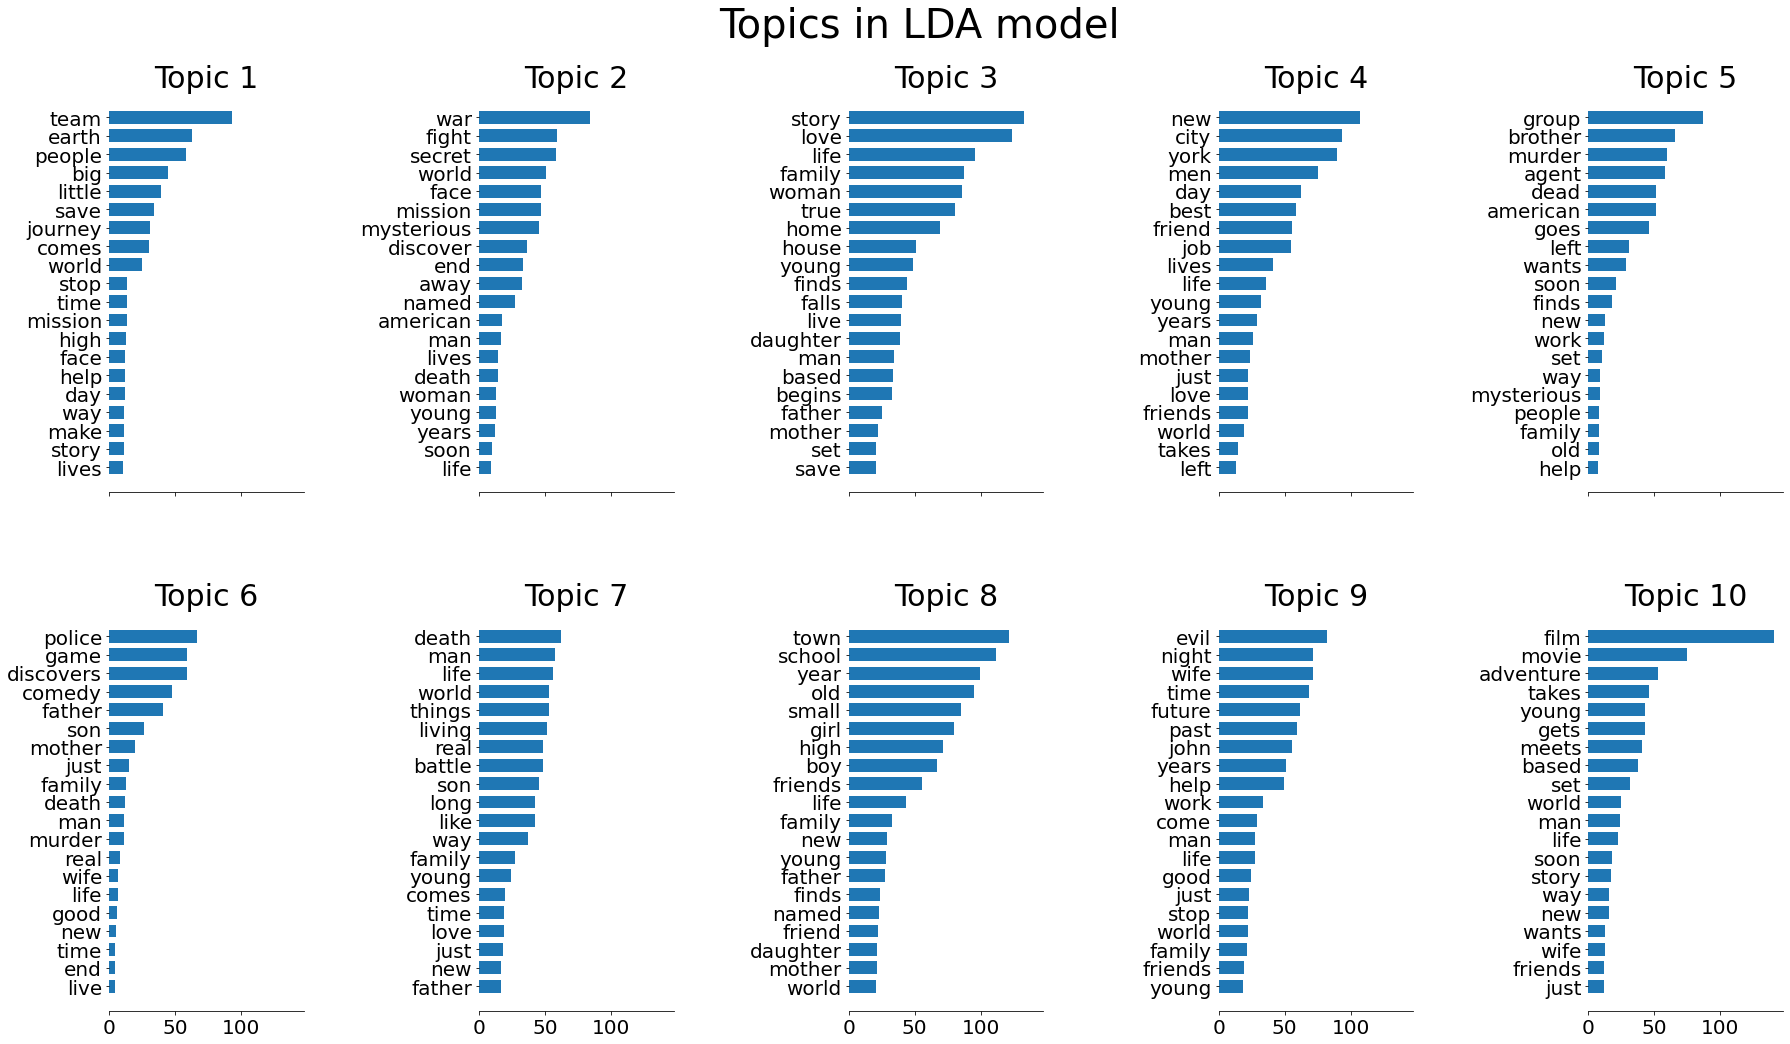

In [62]:
print(lda.components_)
%matplotlib inline
plot_top_words(lda, tfidf_feature_names, n_top_words, "Topics in LDA model")

### 2.3. Analysis Task: Searching for similar movies

Assume you would like to find similar movies as ‘Spider-Man’ based on the given dataset, what
would you do? Please introduce your solution step-by-step, where such information should be
provided:
1. Details on each step and espected inputs/outputs of each step
2. Major algorithm to be used to solve this problem
3. The results
4. Analysis on the results
Be noted visualization should be used when exploring the data or illustrating the results

In [63]:
# Cosine similarity calculation
# Creating a vector for 'description' column
cos_sim = CountVectorizer(min_df=0.0, stop_words='english').fit_transform(df['description'])
# Creating the column to a numpy array 
cos_sim = cos_sim.toarray()
# Calculating cosine similarity between Spider-Man movie and the others 
pcw_sim = cosine_similarity(cos_sim,cos_sim)
# Creating a dataframe of similarity values
df['pairwise_similarity'] = pcw_sim[159]
# Making a new dataframe from sorted top 10 cosine similarity vales 
df[['title', 'pairwise_similarity']].sort_values('pairwise_similarity', ascending=False).head(11)

title  pairwise_similarity
159                 Spider-Man                 1.00
3124                  The Reef                 0.24
38    The Amazing Spider-Man 2                 0.22
1119            21 Jump Street                 0.22
1720                  Kick-Ass                 0.20
20      The Amazing Spider-Man                 0.20
5                 Spider-Man 3                 0.19
1383                     Radio                 0.18
2163              The Covenant                 0.18
2740               The New Guy                 0.18
3216                  Election                 0.17

In [64]:
# Euclidean distance calculation
# Remember the corpus again
corpus = df['description']
# Creating a vector from the corpus
vec_corpus = CountVectorizer(min_df=0 ,stop_words='english').fit_transform(corpus).todense()
# Finding distances inside the vector
edv= euclidean_distances(vec_corpus)
# Finding eculidean distance between Spider-Man and the other movies
edv = edv[159]
# Creating a dataframe of euclidean distance values
df['euclidean_distances'] = edv
# Making a new dataframe from sorted top 10 euclidean distance vales 
df[['title','euclidean_distances']].sort_values('euclidean_distances').head(11)

title  euclidean_distances
159                     Spider-Man                 0.00
4401           The Helix... Loaded                 4.47
4458           Harrison Montgomery                 4.80
3523                   Khiladi 786                 4.90
2192  The Greatest Story Ever Told                 5.00
4547  Scott Walker: 30 Century Man                 5.00
4289       Da Sweet Blood of Jesus                 5.00
4178                 Higher Ground                 5.00
4513                         Benji                 5.00
4593                      Trekkies                 5.00
3781  The Loss of Sexual Innocence                 5.10

In [65]:
# Cosine similarity calculation by tf-idf model
# Creating a tf-idf model
tf_idf = TfidfVectorizer(min_df=0.0, max_df=1.0, stop_words='english').fit_transform(df['description'])
# Finding cosine similarity for tf-idf vector
cs_sim = linear_kernel(tf_idf[159], tf_idf).flatten()
# Creating a dataframe for cosine similatiry values 
df['cos_sim_with_tfidf'] = cs_sim
# Making a new dataframe from sorted top 10 cosine similarity vales for tfidf vector
df[['title','cos_sim_with_tfidf']].sort_values('cos_sim_with_tfidf', ascending = False).head(11)

title  cos_sim_with_tfidf
159                  Spider-Man                1.00
5                  Spider-Man 3                0.25
38     The Amazing Spider-Man 2                0.21
20       The Amazing Spider-Man                0.19
30                 Spider-Man 2                0.18
1534              Arachnophobia                0.15
953   Gremlins 2: The New Batch                0.14
3124                   The Reef                0.14
2163               The Covenant                0.12
1673            Little Nicholas                0.12
1720                   Kick-Ass                0.12

In [66]:
# Euclidean distance calculation by tf-idf model
# Creating a tf-idf model
tf_idf_ed = TfidfVectorizer(min_df=0, stop_words='english').fit_transform(df['description']).todense()
# Finding euclidean distance for tf-idf vector
ec_dist = euclidean_distances(tf_idf_ed)
# Finding distances between Spider-Man and the other movies
ec_dist = ec_dist[159]
# Creating a dataframe for euclidean distance values of tf-idf vector
df['euclidean_distance_tfidf'] = ec_dist
# Making a new dataframe from sorted top 10 euclidean distance vales 
df[['title', 'euclidean_distance_tfidf']].sort_values('euclidean_distance_tfidf').head(11)

title  euclidean_distance_tfidf
159                  Spider-Man                      0.00
4401        The Helix... Loaded                      1.00
5                  Spider-Man 3                      1.23
38     The Amazing Spider-Man 2                      1.26
20       The Amazing Spider-Man                      1.27
30                 Spider-Man 2                      1.28
1534              Arachnophobia                      1.30
953   Gremlins 2: The New Batch                      1.31
3124                   The Reef                      1.31
2163               The Covenant                      1.33
1673            Little Nicholas                      1.33

In [67]:
# Manhattan distance of the tf-idf model
# Creating a tf-idf model
tfidf_md = TfidfVectorizer(min_df=0, stop_words='english').fit_transform(df['description']).todense()
# Finding manhattan distance for tf-idf vector
man_dist = manhattan_distances(tfidf_md)
# Finding distances between Spider-Man and the other movies
man_dist = man_dist[159]
# Creating a dataframe for manhattan distance values of tf-idf vector
df['manhattan_distance_tfidf'] = man_dist
# Making a new dataframe from sorted top 10 euclidean distance vales 
df[['title', 'manhattan_distance_tfidf']].sort_values('manhattan_distance_tfidf').head(11)

title  manhattan_distance_tfidf
159                     Spider-Man                      0.00
4401           The Helix... Loaded                      4.00
4458           Harrison Montgomery                      5.65
4638      Amidst the Devil's Wings                      5.73
3523                   Khiladi 786                      5.95
2192  The Greatest Story Ever Told                      6.13
4289       Da Sweet Blood of Jesus                      6.19
4178                 Higher Ground                      6.19
4593                      Trekkies                      6.20
4513                         Benji                      6.21
4547  Scott Walker: 30 Century Man                      6.22